# Aplicação de Modelos de Markov e Redes Neurais LSTM na Previsão de Arrecadação do ICMS Paulista
## Resultados dos Experimentos Univariados e Univariados com Regressão Múltipla para as Previsões Anuais de 2013 a 2022

### Antonio Sergio Ferreira Bonato

Atualmente, na Secretaria da Fazenda e Planejamento do Estado de São Paulo, a previsão de arrecadação do ICMS paulista é feita usando-se um modelo ARIMA com variáveis exógenas, o ARIMAX. Mas o ICMS é não linear e há várias quebras estruturais controladas com diversas *dummies*. A consequência é um modelo bastante sobreajustado, inadequado para previsões de mais longo prazo (mais do que alguns meses, muito menos para um ano). 
A proposta deste trabalho é utilizar modelos não lineares na previsão do ICMS paulista, utilizando redes neurais recorrentes LSTM (*Long Short Term Memory*) e modelos Markov-Switching, fazendo um contraponto entre estes dois modelos. E utilizar, como baseline de comparação, o modelo ARIMAX atual. 

**Palavras-chave**: Markov-Switching Models. Redes Neurais Recorrentes. LSTM. ICMS.

## Análise dos Resultados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
seed = 42
random.seed(seed)
np.random.seed(seed)

sns.set()
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(10,7)})

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
df_metricas_all = pd.read_excel("metricas.xlsx")
df_metricas_all.head()

,metrica,RMSE,MAPE,ano,experimento,estratégia,BIC,MAPE Val,Escolha
0,Mean,8.680759e+08,0.071311,2013,univariado,naive,NaN,NaN,1
1,"SARIMA(0,1,1),(1,0,1)",3.634953e+08,0.032571,2013,univariado,sarima,-405.970850,NaN,1
2,"SARIMAX(2,1,1),(1,0,1)",3.502613e+08,0.030468,2013,univariado,sarimax,-438.028928,NaN,0
3,"SARIMAX(0,1,1),(1,0,1)",3.252917e+08,0.028308,2013,univariado,sarimax,-445.761862,NaN,1
4,Markov-Fixed,6.408498e+08,0.063012,2013,univariado,markov-switching,-3.410553,NaN,1


In [4]:
print(df_metricas_all.loc[
    (df_metricas_all.ano==2022) & 
    (df_metricas_all.experimento=='univariado'), ['metrica', 'estratégia',
                                'BIC', 'MAPE Val', 'Escolha']].to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
               metrica &       estratégia &         BIC &  MAPE Val &  Escolha \\
\midrule
                  Mean &            naive &         NaN &       NaN &        1 \\
 SARIMA(0,1,1),(2,0,1) &           sarima & -761.133000 &       NaN &        0 \\
 SARIMA(0,1,1),(1,0,1) &           sarima & -761.151000 &       NaN &        1 \\
SARIMAX(0,1,1),(2,0,0) &          sarimax & -815.743000 &       NaN &        0 \\
SARIMAX(0,1,1),(1,0,1) &          sarimax & -818.740000 &       NaN &        1 \\
          Markov-Fixed & markov-switching &   -3.297937 &       NaN &        0 \\
  Markov-Switching-Var & markov-switching &   -3.341894 &       NaN &        0 \\
       Markov-Mean-Var & markov-switching &   -3.353027 &       NaN &        1 \\
        RNN-LSTM-1-mês &         rnn-lstm &         NaN &  0.109748 &        0 \\
     RNN-LSTM-12-meses &         rnn-lstm &         NaN &  0.095597 &        1 \\
\bottomrule
\end{tabular}



In [5]:
print(df_metricas_all.loc[
    (df_metricas_all.ano==2022) & 
    (df_metricas_all.experimento=='múltipla'), ['metrica', 'estratégia',
                                'BIC', 'MAPE Val', 'Escolha']].to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
               metrica &       estratégia &         BIC &  MAPE Val &  Escolha \\
\midrule
 SARIMAX(0,1,1)(2,0,1) &          sarimax & -829.761000 &       NaN &        0 \\
SARIMAX(0,1,1),(1,0,1) &          sarimax & -830.128000 &       NaN &        1 \\
          Markov-Fixed & markov-switching &   -3.300642 &       NaN &        0 \\
  Markov-Switching-Var & markov-switching &   -3.334533 &       NaN &        0 \\
       Markov-Mean-Var & markov-switching &   -3.356496 &       NaN &        1 \\
              RNN-LSTM &         rnn-lstm &         NaN &   0.06552 &        1 \\
\bottomrule
\end{tabular}



### Filtram-se somente os modelos escolhidos de cada experimento e estratégia

In [6]:
df_metricas = df_metricas_all[df_metricas_all.Escolha == 1].copy()

## Menor MAPE por experimento por ano
Independente de estratégia, menor MAPE para o experimento univariado e univariado com regrassão múltipla.

Text(0.5, 1.0, 'Menor MAPE por Experimento')

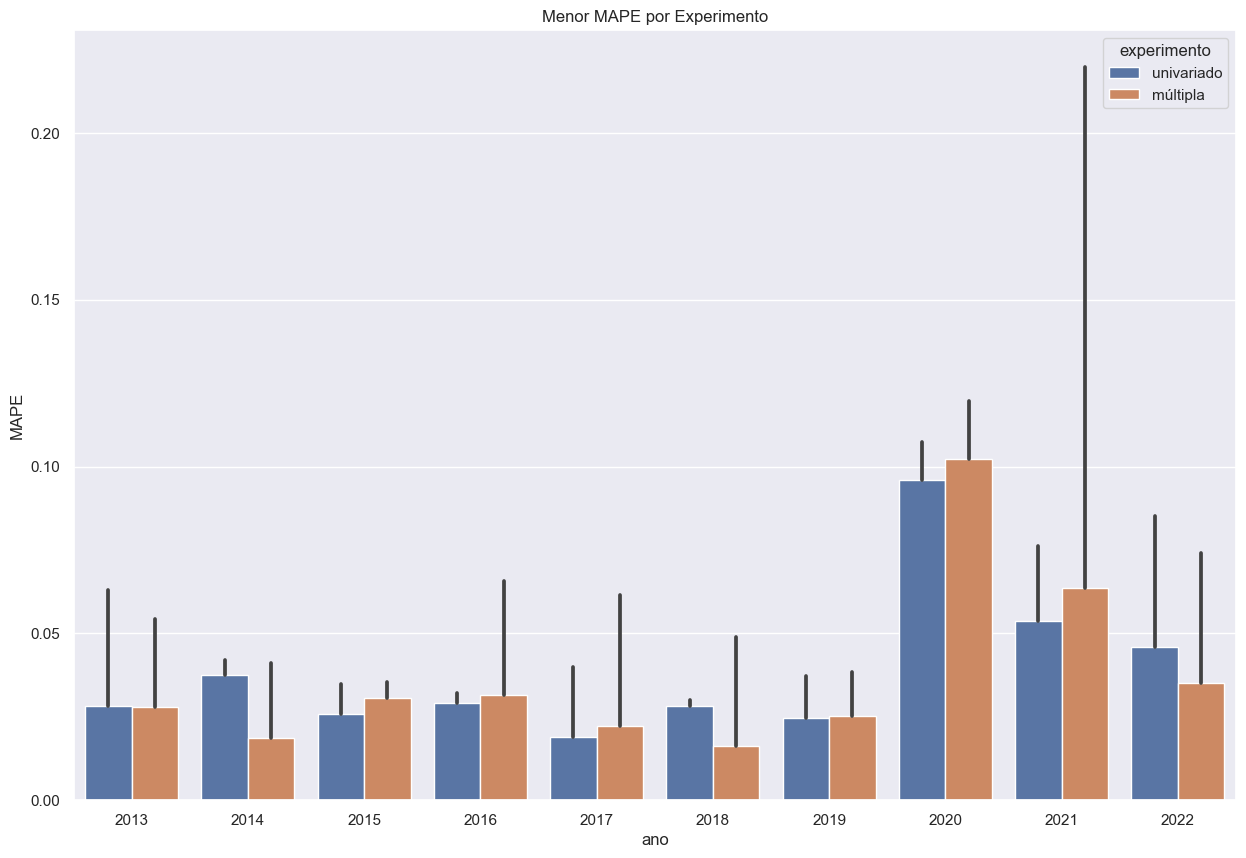

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_metricas, hue='experimento', estimator=min)
ax.set_title('Menor MAPE por Experimento')
#_ = plt.xticks(rotation=45)

### Média dos MAPE por Ano de Todos os Experimentos e Estratégias

Text(0.5, 1.0, 'Média dos MAPE por Ano dos Melhores Modelos por Estratégia')

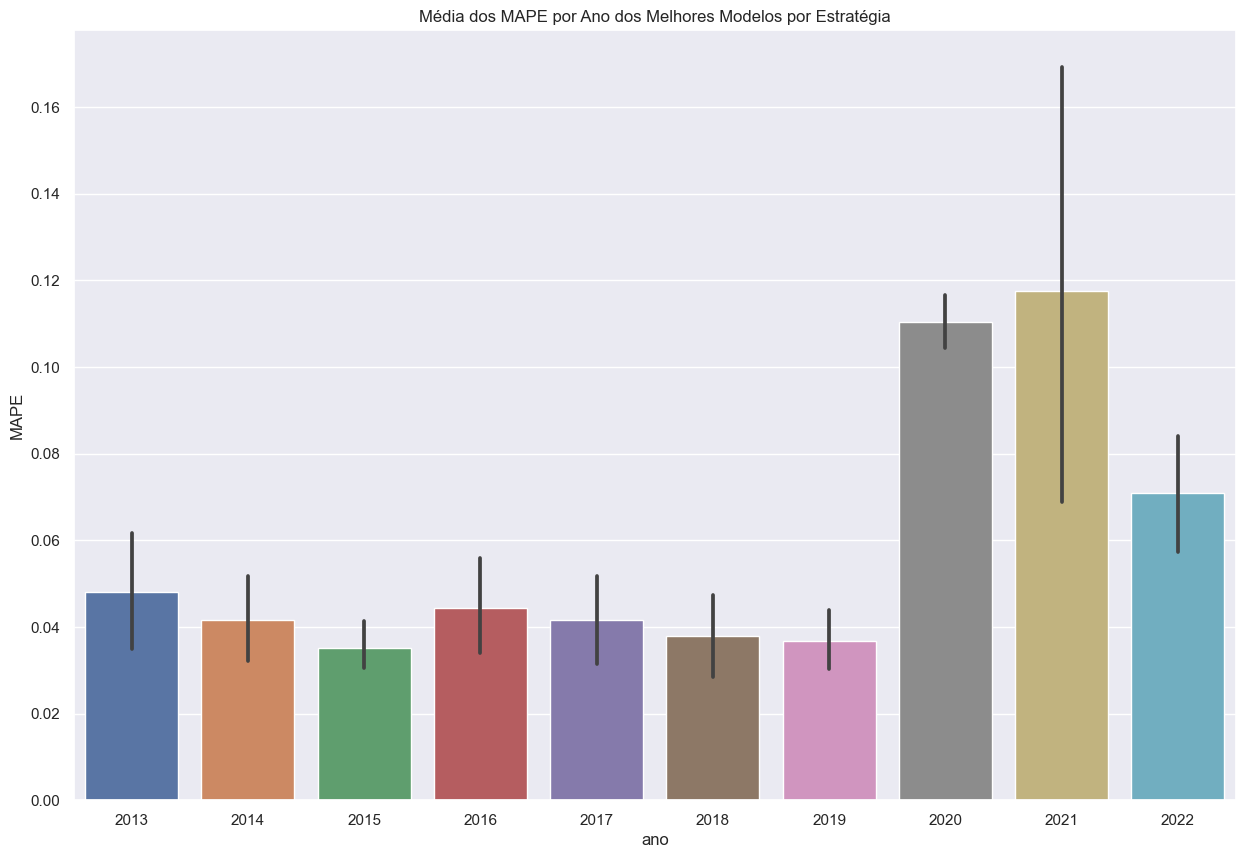

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_metricas)
ax.set_title('Média dos MAPE por Ano dos Melhores Modelos por Estratégia')

### MAPE de Cada Estratégia, por Ano, por Experimento Univariado com Regressão Múltipla

In [9]:
df_multi = df_metricas[df_metricas['experimento']=='múltipla']

Text(0.5, 1.0, 'MAPE por Ano dos Melhores Modelos por Estratégia dos Experimento Univariado com Regressão Múltipla')

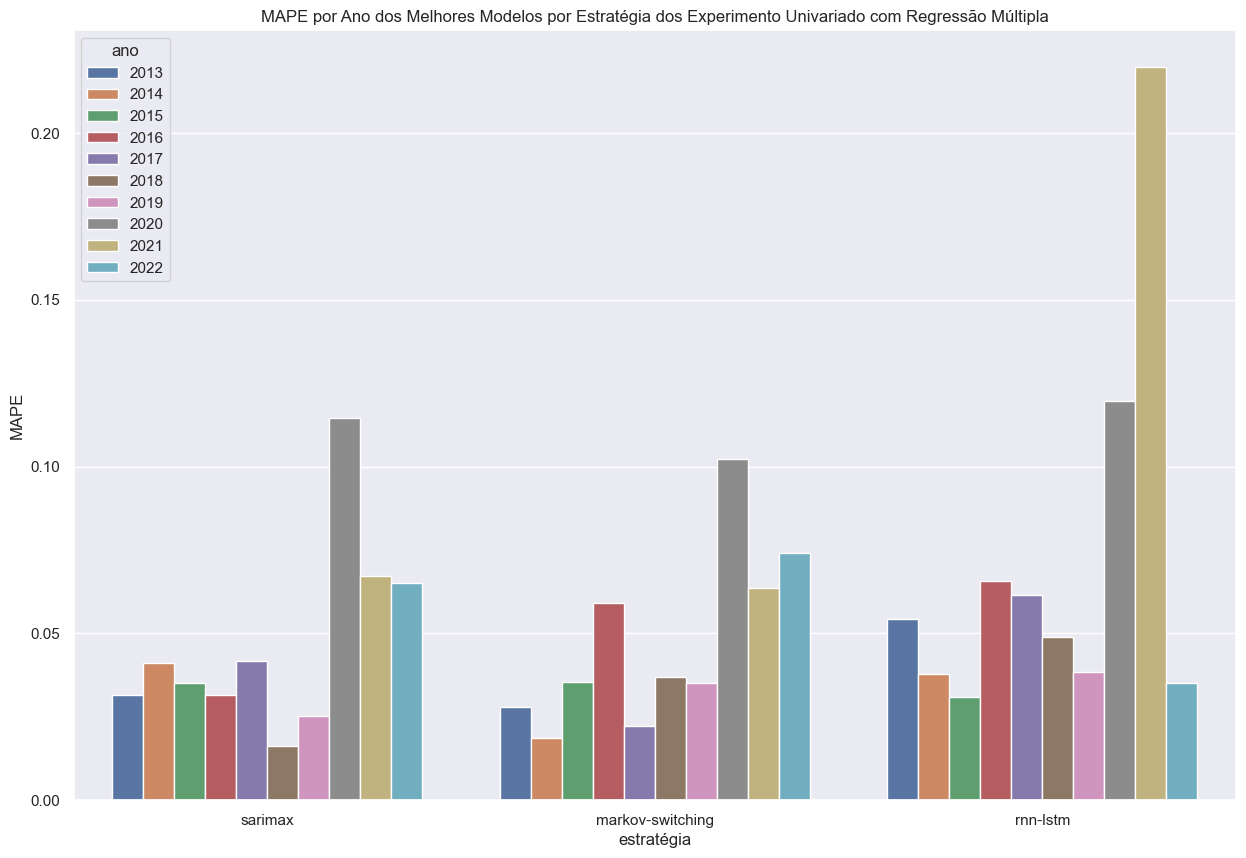

In [10]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='estratégia', y='MAPE', data=df_multi, hue='ano')
ax.set_title('MAPE por Ano dos Melhores Modelos por Estratégia dos Experimento Univariado com Regressão Múltipla')

### MAPE de Cada Estratégia, por Ano, por Experimento Univariado

In [11]:
df_uni = df_metricas[df_metricas['experimento']=='univariado']

Text(0.5, 1.0, 'MAPE por Ano dos Melhores Modelos por Estratégia dos Experimentos Univariados')

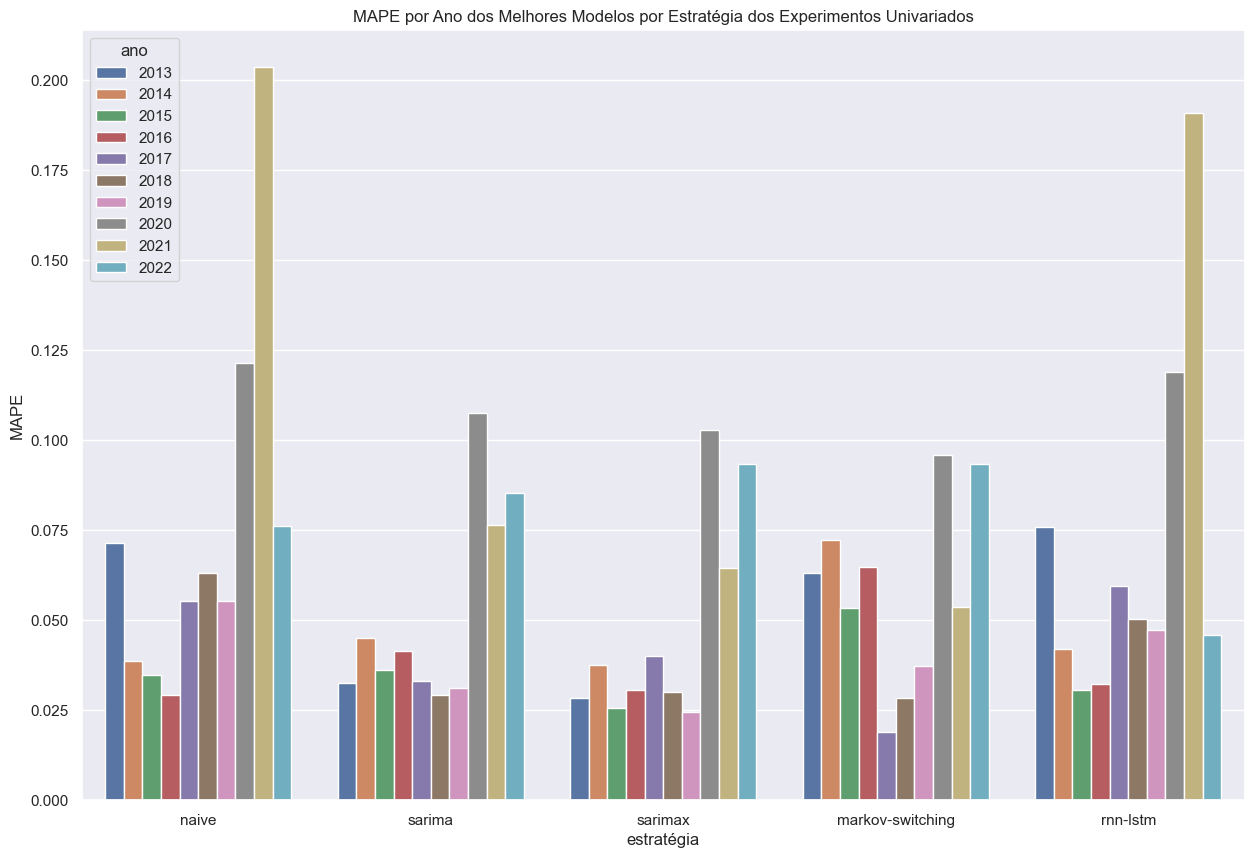

In [12]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='estratégia', y='MAPE', data=df_uni, hue='ano')
ax.set_title('MAPE por Ano dos Melhores Modelos por Estratégia dos Experimentos Univariados')

## MAPE por estratégia por ano

### Experimento univariado

Text(0.5, 1.0, 'MAPE por Estratégia por Ano para o Experimento Univariado')

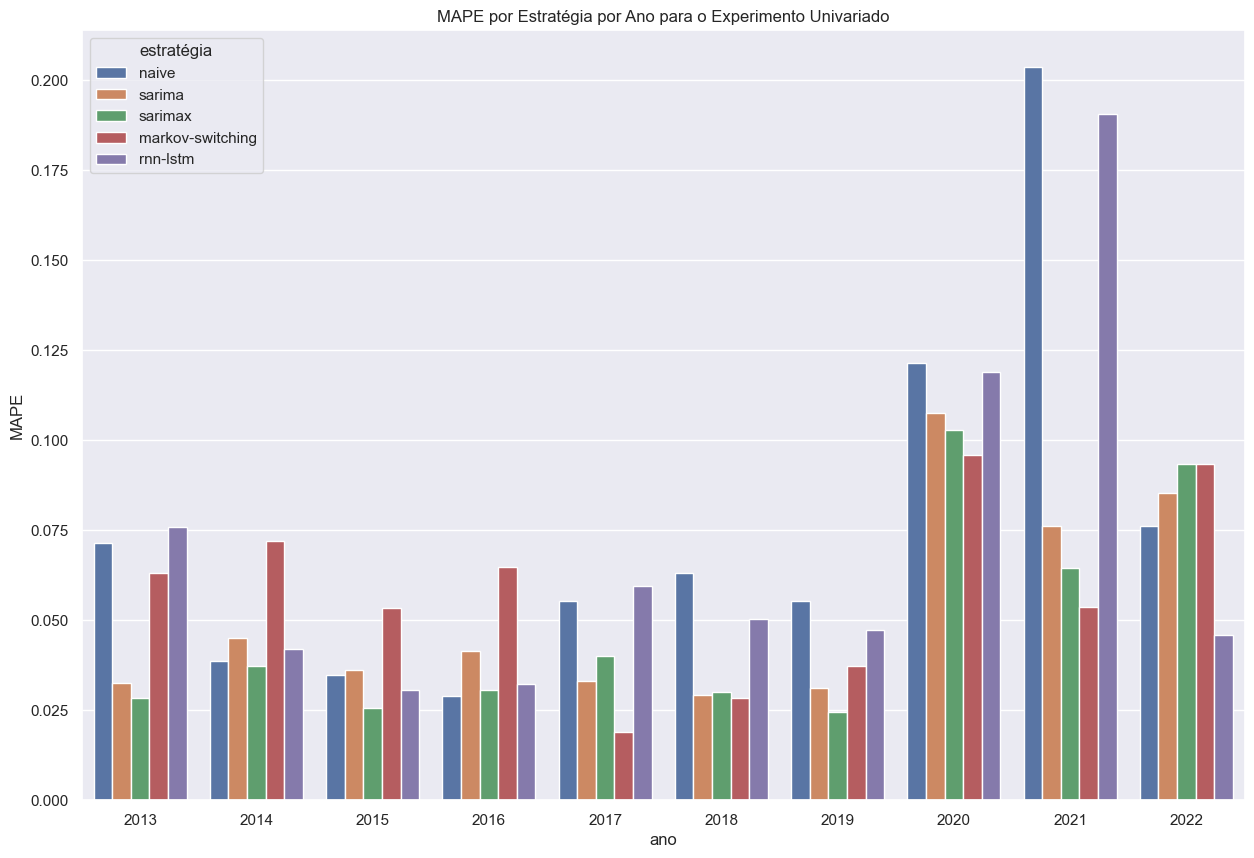

In [13]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_metricas[df_metricas.experimento == "univariado"], 
                 hue='estratégia')
ax.set_title('MAPE por Estratégia por Ano para o Experimento Univariado')
#_ = plt.xticks(rotation=45)

### Experimento univariado com regressão múltipla

Text(0.5, 1.0, 'MAPE por Estratégia por Ano para o Experimento Univariado com Regressão Múltipla')

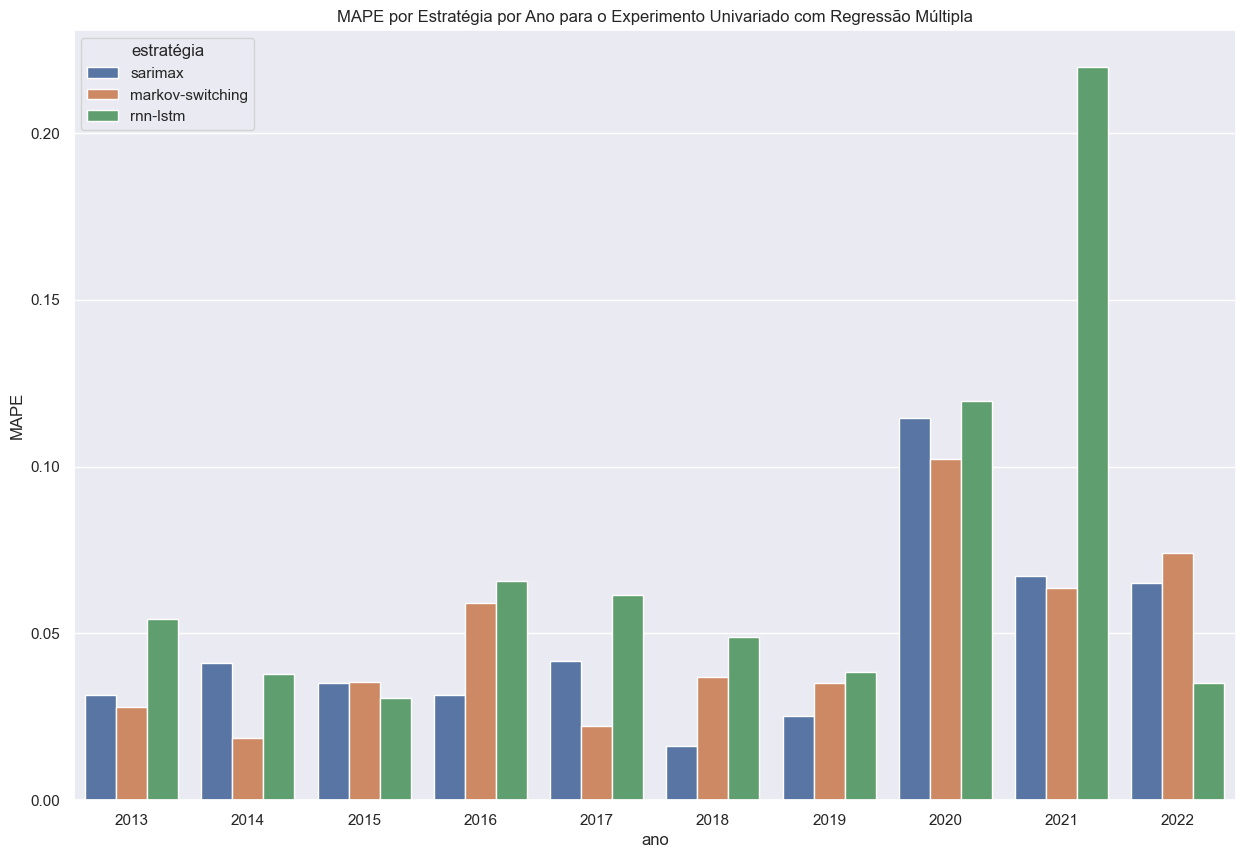

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_metricas[df_metricas.experimento == "múltipla"], 
                 hue='estratégia')
ax.set_title('MAPE por Estratégia por Ano para o Experimento Univariado com Regressão Múltipla')
#_ = plt.xticks(rotation=45)

## Menor MAPE do Ano, independente de experimento e estratégia

In [15]:
idx = df_metricas.groupby('ano')['MAPE'].idxmin()
df_min_mape = df_metricas.loc[idx, ['ano', 'experimento', 'estratégia', 'RMSE', 'MAPE']]
df_min_mape

,ano,experimento,estratégia,RMSE,MAPE
11,2013,múltipla,markov-switching,3.182631e+08,0.027844
24,2014,múltipla,markov-switching,2.226930e+08,0.018645
28,2015,univariado,sarimax,3.383003e+08,0.025731
38,2016,univariado,naive,3.592372e+08,0.029089
55,2017,univariado,markov-switching,2.717801e+08,0.018942
74,2018,múltipla,sarimax,2.345069e+08,0.016283
82,2019,univariado,sarimax,3.803392e+08,0.024521
97,2020,univariado,markov-switching,1.411437e+09,0.095877
112,2021,univariado,markov-switching,1.036629e+09,0.053760
136,2022,múltipla,rnn-lstm,6.599282e+08,0.035033


### Menor MAPE por Estratégia por Ano Independente de Experimento

Text(0.5, 1.0, 'Estratégia com Menor MAPE por Ano')

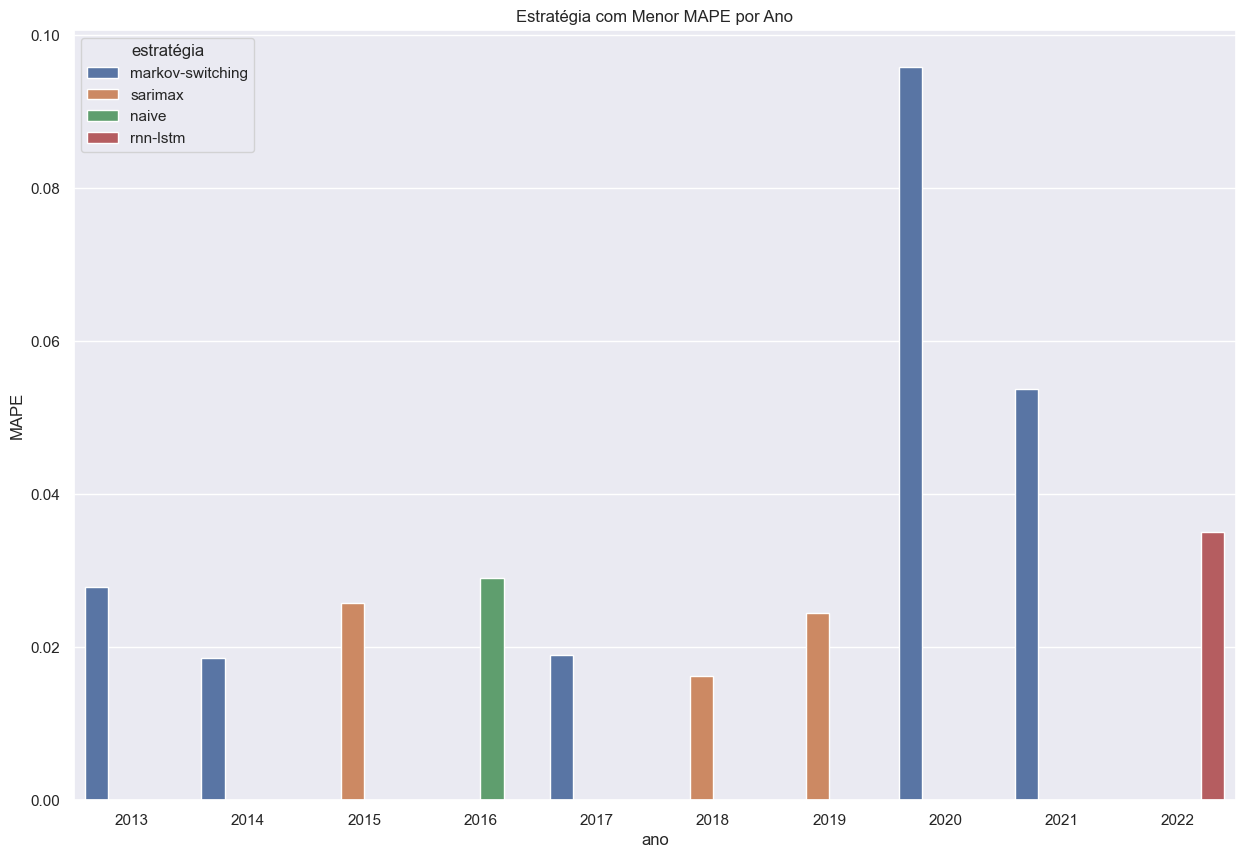

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_min_mape, hue='estratégia')
ax.set_title('Estratégia com Menor MAPE por Ano')

### Menor MAPE por Experimento por Ano Independente de Estratégia

Text(0.5, 1.0, 'Experimento com Menor MAPE por Ano')

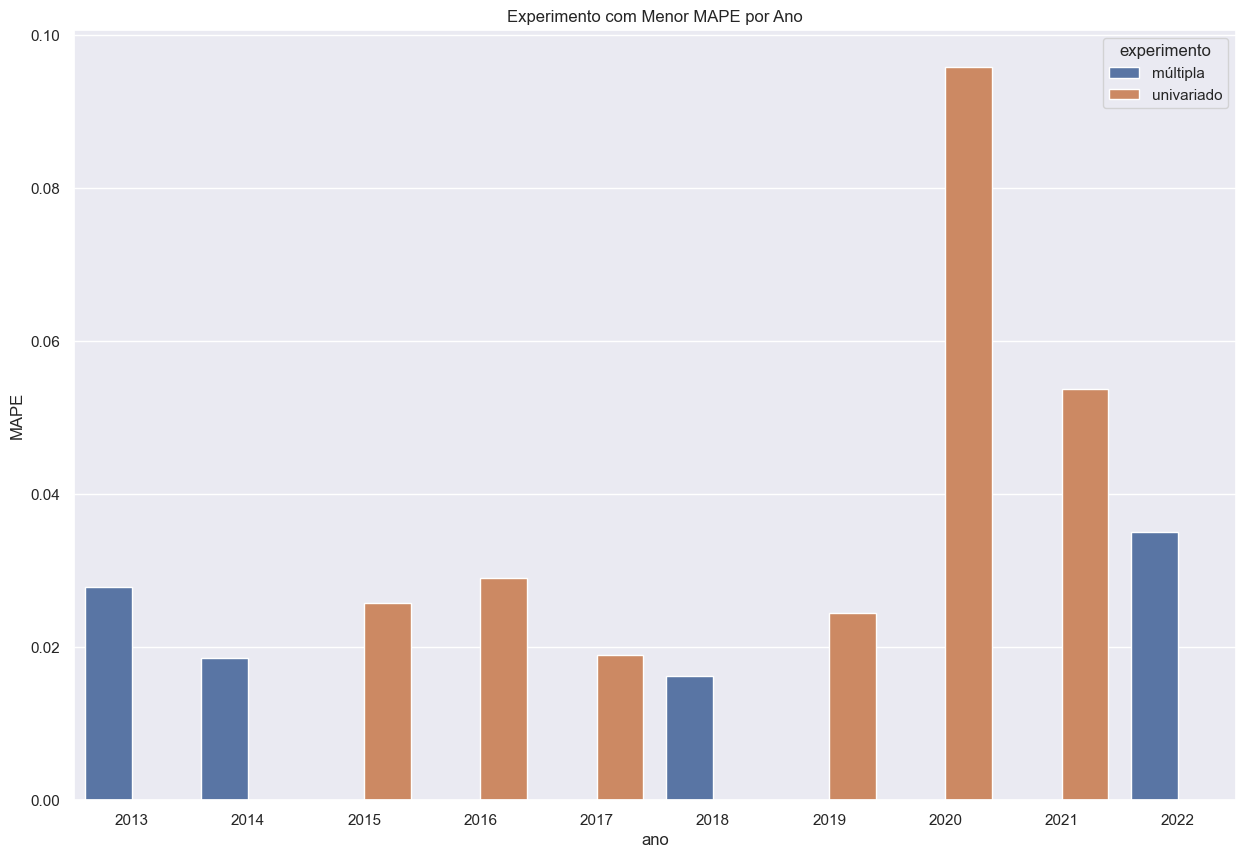

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_min_mape, hue='experimento')
ax.set_title('Experimento com Menor MAPE por Ano')

## Menor MAPE do Ano por experimento

In [18]:
idx_est = df_metricas.groupby(['ano', 'experimento'])['MAPE'].idxmin()
df_min_mape_est = df_metricas.loc[idx_est, ['ano', 'experimento', 'estratégia', 'RMSE', 'MAPE']]
df_min_mape_est.head()

,ano,experimento,estratégia,RMSE,MAPE
11,2013,múltipla,markov-switching,3.182631e+08,0.027844
3,2013,univariado,sarimax,3.252917e+08,0.028308
24,2014,múltipla,markov-switching,2.226930e+08,0.018645
15,2014,univariado,sarimax,4.347452e+08,0.037423
37,2015,múltipla,rnn-lstm,3.830873e+08,0.030787


### Menor MAPE por Estratégia por Ano por Experimento Univariado

Text(0.5, 1.0, 'Estratégia com Menor MAPE por Ano')

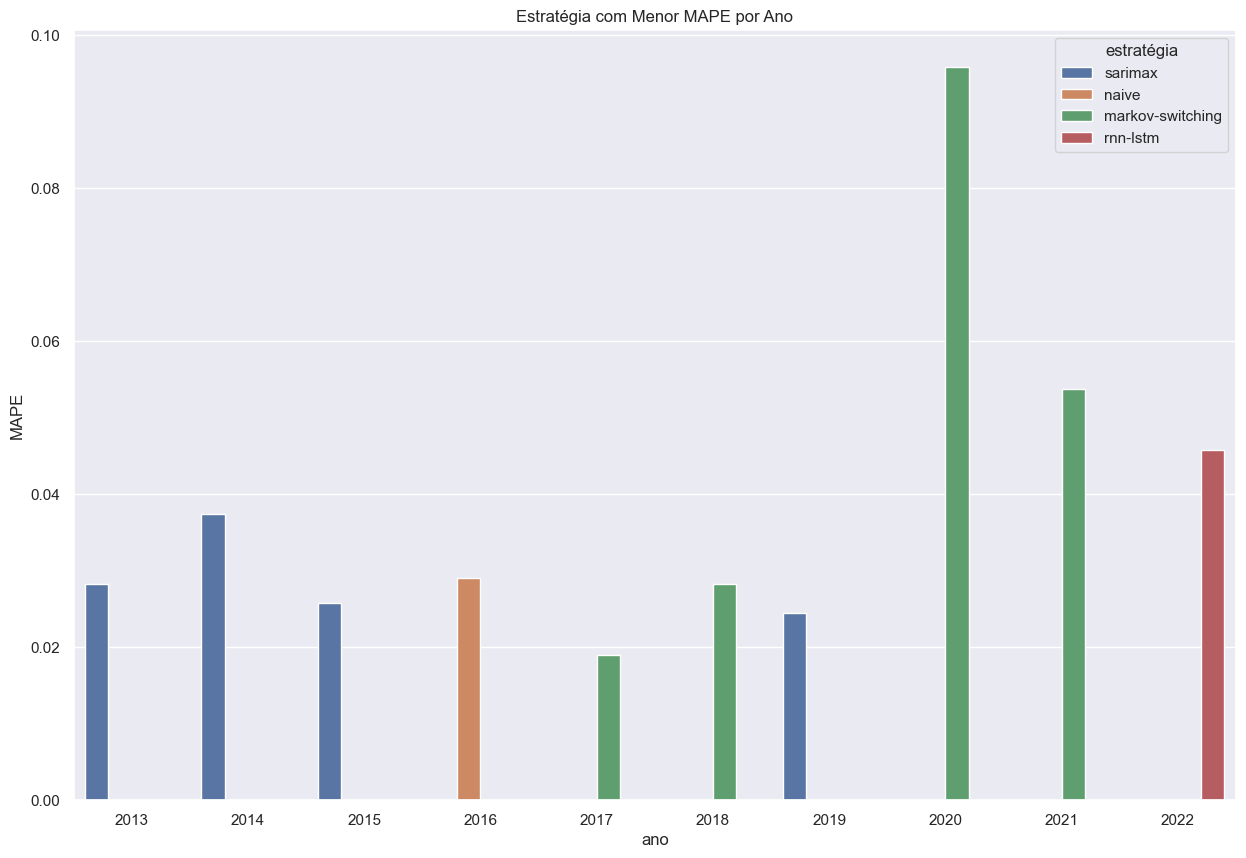

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', 
                 data=df_min_mape_est[df_min_mape_est.experimento == 'univariado'], 
                 hue='estratégia')
ax.set_title('Estratégia com Menor MAPE por Ano')

### Menor MAPE por Estratégia por Ano por Experimento Univariado com Regressão Múltipla

Text(0.5, 1.0, 'Estratégia com Menor MAPE por Ano')

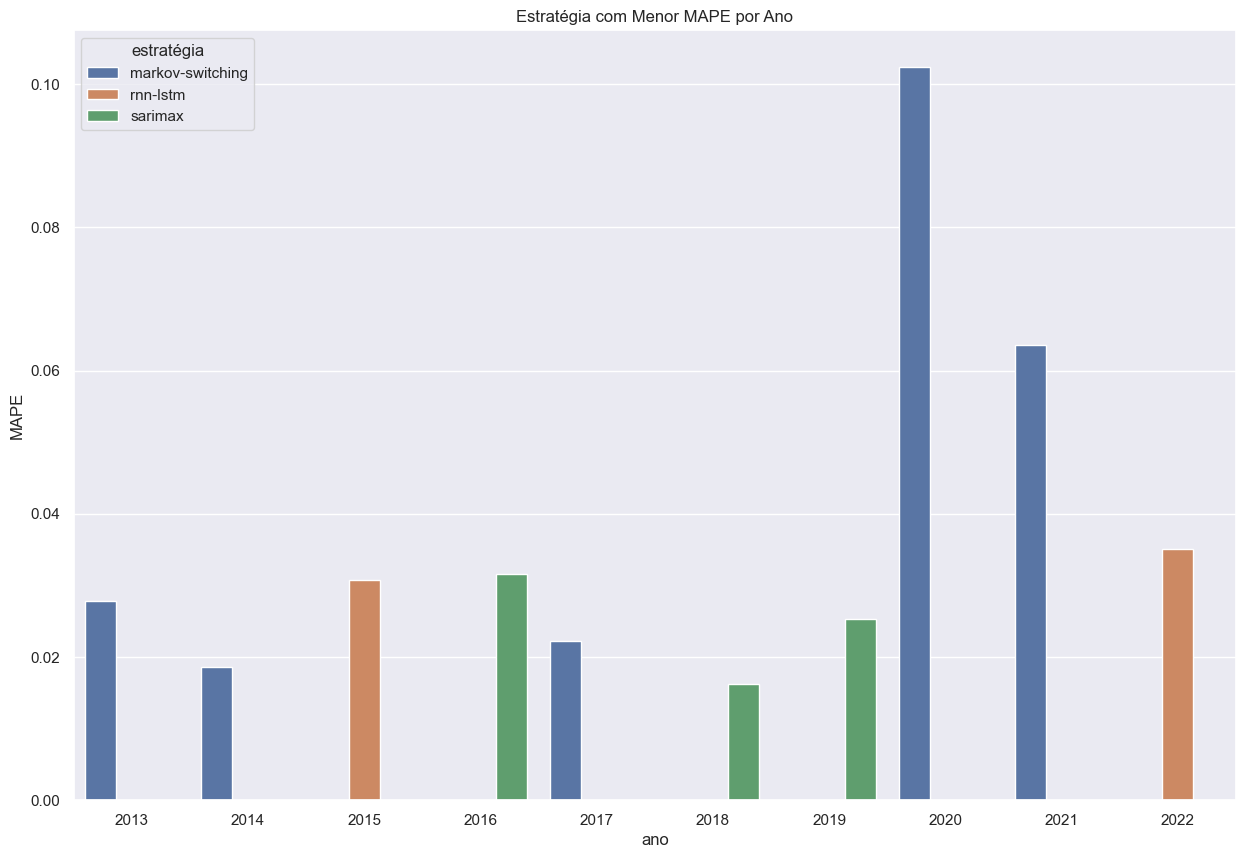

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', 
                 data=df_min_mape_est[df_min_mape_est.experimento == 'múltipla'], 
                 hue='estratégia')
ax.set_title('Estratégia com Menor MAPE por Ano')

Text(0.5, 1.0, 'Menor MAPE por Experimento')

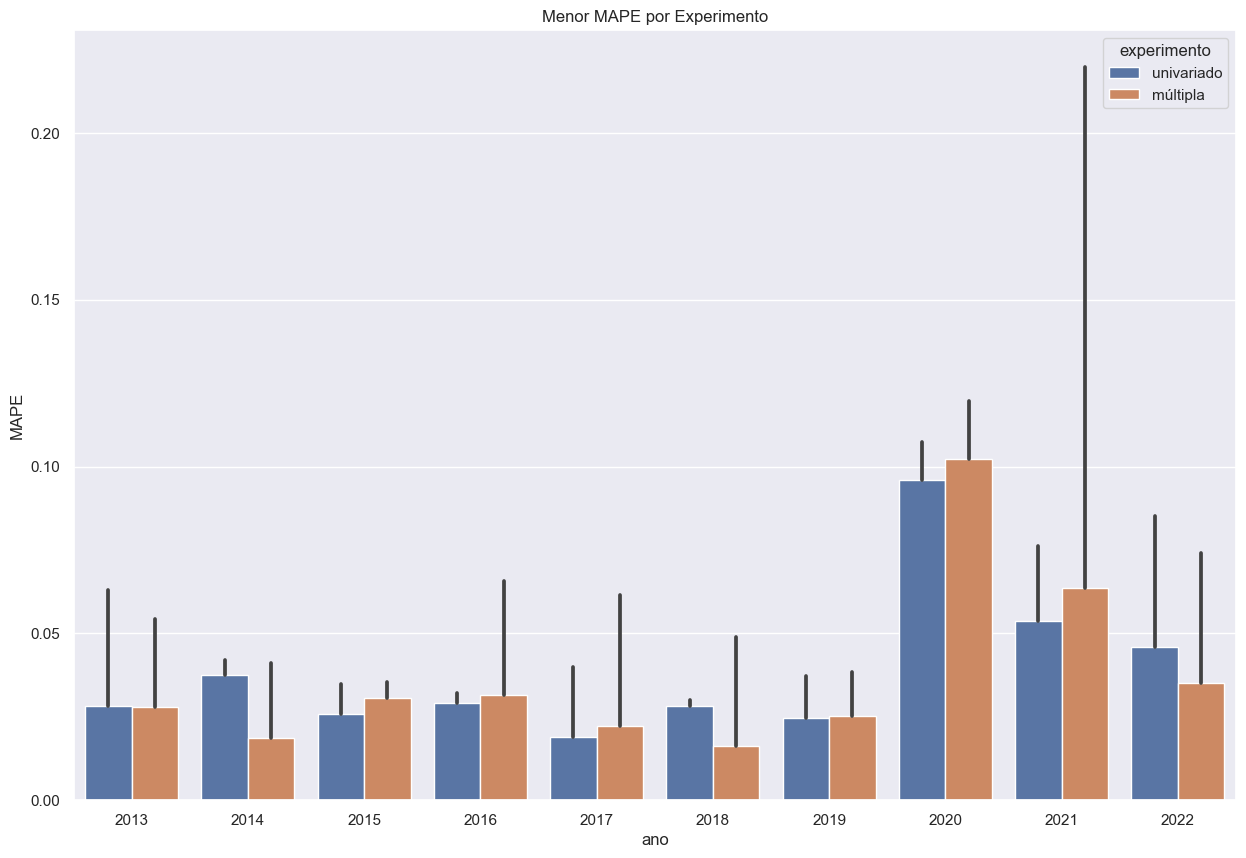

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=df_metricas, hue='experimento', estimator=np.min)
ax.set_title('Menor MAPE por Experimento')

In [22]:
arq = open('./mcs.txt', 'r')
print(arq.read())
arq.close()

Model naive univariado eliminated 2023-08-21 16:55:09.108596
Model rnn-lstm múltipla eliminated 2023-08-21 16:55:13.583389
Model rnn-lstm univariado eliminated 2023-08-21 16:55:17.589689
##########################################################################################
Superior Set Model created	:
                            Rank_M        v_M  MCS_M Rank_R        v_R  MCS_R       Loss
sarima univariado                4  1.3095335 0.4948      5  3.1235342 0.0000 0.05180554
sarimax univariado               2 -1.4896768 1.0000      3  0.3269794 1.0000 0.04771008
markov-switching univariado      5  1.4147725 0.4182      4  1.6145359 0.4724 0.05808682
sarimax múltipla                 1 -1.9975809 1.0000      1 -0.1841693 1.0000 0.04698628
markov-switching múltipla        3 -0.8509486 1.0000      2  0.1841693 1.0000 0.04752559
p-value	:
[1] 0.4182

##########################################################################################


In [23]:
df_metricas_all

,metrica,RMSE,MAPE,ano,experimento,estratégia,BIC,MAPE Val,Escolha
0,Mean,8.680759e+08,0.071311,2013,univariado,naive,NaN,NaN,1
1,"SARIMA(0,1,1),(1,0,1)",3.634953e+08,0.032571,2013,univariado,sarima,-405.970850,NaN,1
2,"SARIMAX(2,1,1),(1,0,1)",3.502613e+08,0.030468,2013,univariado,sarimax,-438.028928,NaN,0
3,"SARIMAX(0,1,1),(1,0,1)",3.252917e+08,0.028308,2013,univariado,sarimax,-445.761862,NaN,1
4,Markov-Fixed,6.408498e+08,0.063012,2013,univariado,markov-switching,-3.410553,NaN,1
...,...,...,...,...,...,...,...,...,...
132,"SARIMAX(0,1,1),(1,0,1)",1.451333e+09,0.065229,2022,múltipla,sarimax,-830.128000,NaN,1
133,Markov-Fixed,1.555024e+09,0.076957,2022,múltipla,markov-switching,-3.300642,NaN,0
134,Markov-Switching-Var,1.727172e+09,0.092085,2022,múltipla,markov-switching,-3.334533,NaN,0
135,Markov-Mean-Var,1.499231e+09,0.074070,2022,múltipla,markov-switching,-3.356496,NaN,1


## Melhores estratégias considerando os melhores MAPEs.
Não seria possível utilizar esta forma de escolha das estratégias para previsão pois esta avaliação só pode ser feita a posteriori, isto é, quando se tem em mãos a série realizada. Entretanto, é um exercício válido para se entender quais teriam sido os melhores modelos caso critérios de escolha melhores do que os critérios de informação de Akaike e Schwarzs para os modelos SARIMA, SARIMAX e Markov-Switching ou o melhor MAPE em validação para as Redes Neurais estivessem disponíveis. 

### Experimentos Univariados

In [24]:
min_mape_uni = df_metricas_all[df_metricas_all.experimento=='univariado'].groupby(['ano'])[['MAPE']].min()
min_mape_uni

,MAPE
ano,
2013,0.028308
2014,0.030845
2015,0.025731
2016,0.029089
2017,0.018942
2018,0.027734
2019,0.024521
2020,0.095877
2021,0.053760


In [25]:
df_metricas_all[df_metricas_all.MAPE.isin(min_mape_uni.MAPE)][['ano', 'metrica',
                                                               'estratégia','MAPE']]

,ano,metrica,estratégia,MAPE
3,2013,"SARIMAX(0,1,1),(1,0,1)",sarimax,0.028308
18,2014,Markov-Mean-Var,markov-switching,0.030845
28,2015,"SARIMAX(0,1,1),(1,0,1)",sarimax,0.025731
38,2016,Mean,naive,0.029089
55,2017,Markov-Fixed,markov-switching,0.018942
67,2018,"SARIMAX(0,1,1),(1,0,2)",sarimax,0.027734
82,2019,"SARIMAX(0,1,1),(1,0,1)",sarimax,0.024521
97,2020,Markov-Switching-Var,markov-switching,0.095877
112,2021,Markov-Mean-Var,markov-switching,0.053760
129,2022,RNN-LSTM-1-mês,rnn-lstm,0.037627


In [26]:
df_metricas_all[df_metricas_all.MAPE.isin(min_mape_uni.MAPE)].groupby(['estratégia'])['estratégia'].count()

estratégia
markov-switching    4
naive               1
rnn-lstm            1
sarimax             4
Name: estratégia, dtype: int64

A melhor estratégia ainda seria a SARIMAX, mas empatada com Markov-Switching.

### Experimentos Multivariados

In [27]:
min_mape_multi = df_metricas_all[df_metricas_all.experimento=='múltipla'].groupby(['ano'])[['MAPE']].min()
min_mape_multi

,MAPE
ano,
2013,0.027844
2014,0.018645
2015,0.030787
2016,0.031648
2017,0.016581
2018,0.016283
2019,0.023556
2020,0.098225
2021,0.063618


In [28]:
df_metricas_all[df_metricas_all.MAPE.isin(min_mape_multi.MAPE)][['ano', 'metrica', 
                                                                 'estratégia','MAPE']]

,ano,metrica,estratégia,MAPE
11,2013,Markov-Mean-Var,markov-switching,0.027844
24,2014,Markov-Mean-Var,markov-switching,0.018645
37,2015,RNN-LSTM,rnn-lstm,0.030787
46,2016,"SARIMAX(0,1,1),(1,0,1)",sarimax,0.031648
61,2017,Markov-Fixed,markov-switching,0.016581
74,2018,"SARIMAX(0,1,1),(1,0,1)",sarimax,0.016283
88,2019,Markov-Fixed,markov-switching,0.023556
103,2020,Markov-Switching-Var,markov-switching,0.098225
118,2021,Markov-Switching-Var,markov-switching,0.063618
136,2022,RNN-LSTM,rnn-lstm,0.035033


In [29]:
df_metricas_all[df_metricas_all.MAPE.isin(min_mape_multi.MAPE)].groupby(['estratégia'])['estratégia'].count()

estratégia
markov-switching    6
rnn-lstm            2
sarimax             2
Name: estratégia, dtype: int64

Os modelos de mudança markoviana seriam melhores em 60\% dos casos.

### Ambos Experimentos

In [30]:
min_mape = df_metricas_all.groupby(['ano'])[['MAPE']].min()
min_mape

,MAPE
ano,
2013,0.027844
2014,0.018645
2015,0.025731
2016,0.029089
2017,0.016581
2018,0.016283
2019,0.023556
2020,0.095877
2021,0.053760


In [31]:
dados = df_metricas_all[df_metricas_all.MAPE.isin(min_mape.MAPE)][['ano', 'metrica', 
                                                           'experimento', 
                                                           'estratégia','MAPE']]
dados

,ano,metrica,experimento,estratégia,MAPE
11,2013,Markov-Mean-Var,múltipla,markov-switching,0.027844
24,2014,Markov-Mean-Var,múltipla,markov-switching,0.018645
28,2015,"SARIMAX(0,1,1),(1,0,1)",univariado,sarimax,0.025731
38,2016,Mean,univariado,naive,0.029089
61,2017,Markov-Fixed,múltipla,markov-switching,0.016581
74,2018,"SARIMAX(0,1,1),(1,0,1)",múltipla,sarimax,0.016283
88,2019,Markov-Fixed,múltipla,markov-switching,0.023556
97,2020,Markov-Switching-Var,univariado,markov-switching,0.095877
112,2021,Markov-Mean-Var,univariado,markov-switching,0.053760
136,2022,RNN-LSTM,múltipla,rnn-lstm,0.035033


In [32]:
df_metricas_all[df_metricas_all.MAPE.isin(min_mape.MAPE)].groupby(['estratégia'])['estratégia'].count()

estratégia
markov-switching    6
naive               1
rnn-lstm            1
sarimax             2
Name: estratégia, dtype: int64

Os modelos de mudança markoviana seriam melhores em 60\% dos casos.

Text(0.5, 1.0, 'Estratégia Esscolhida a Posteriori com Menor MAPE por Ano')

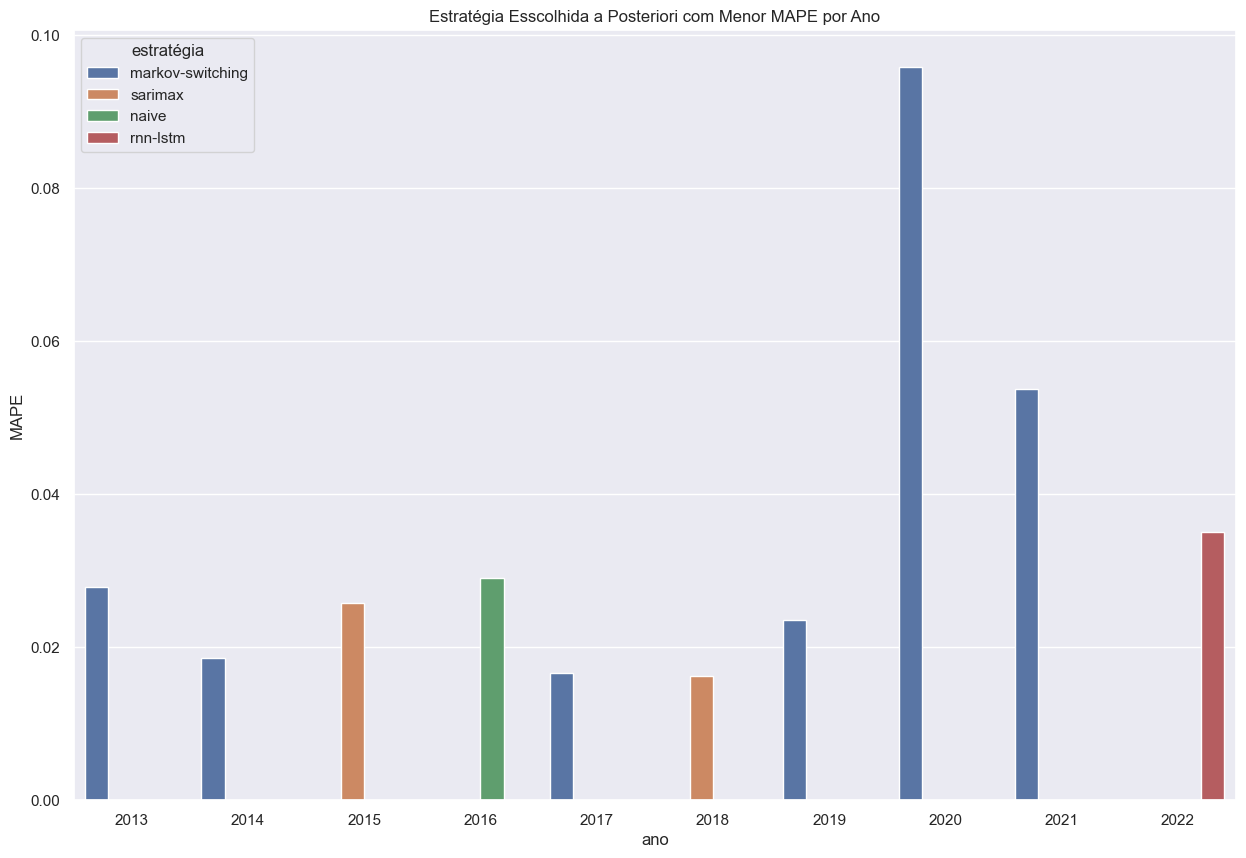

In [33]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ano', y='MAPE', data=dados, hue='estratégia')
ax.set_title('Estratégia Esscolhida a Posteriori com Menor MAPE por Ano')

In [34]:
print(dados.to_latex(escape=False, index=False))

\begin{tabular}{rlllr}
\toprule
 ano &                metrica & experimento &       estratégia &     MAPE \\
\midrule
2013 &        Markov-Mean-Var &    múltipla & markov-switching & 0.027844 \\
2014 &        Markov-Mean-Var &    múltipla & markov-switching & 0.018645 \\
2015 & SARIMAX(0,1,1),(1,0,1) &  univariado &          sarimax & 0.025731 \\
2016 &                   Mean &  univariado &            naive & 0.029089 \\
2017 &           Markov-Fixed &    múltipla & markov-switching & 0.016581 \\
2018 & SARIMAX(0,1,1),(1,0,1) &    múltipla &          sarimax & 0.016283 \\
2019 &           Markov-Fixed &    múltipla & markov-switching & 0.023556 \\
2020 &   Markov-Switching-Var &  univariado & markov-switching & 0.095877 \\
2021 &        Markov-Mean-Var &  univariado & markov-switching & 0.053760 \\
2022 &               RNN-LSTM &    múltipla &         rnn-lstm & 0.035033 \\
\bottomrule
\end{tabular}

